<div style="text-align:center"><h1> Sentiment Analysis of News for Stock Market Prediction <h2>

<div style="text-align:center"><h3>STA141B Final Project by group 16 <h2>

### Introduction

The stock market is one of the most important economic participants. Stock market prediction has been an active area of research for a long time. There are many different ways to interpret the different stock market movements. In this project, analytical tools in Python such as TextBlob and NLTK-Valder Lexicon were used to analyze the sentiment of economic news headlines and examine their effects on stock market changes. This analysis would be especially useful for buyers who are interested in short-term investment based on the financial news and listed companies which need a general idea of the daily market volatility.

This project has two main parts. The influence of the news headlines on 'TSLA', 'AAPL', 'FB', 'GOOG', 'AMZN' stock price movement were evaluated in the first part. Wordcloud was used to show prominence of words in the headlines that appear more frequently for different movement of stock. Then sentiment analysis were performed to quantify the influence of news on the stock. Stock price changes were predicted by using the quantified sentiment value in the second part.

### Problem Statement

The influence of news headlines on 'TSLA', 'AAPL', 'FB', 'GOOG', 'AMZN' stock price movement were evaluated. Sentiment analysis was performed to quantify the influence of news on the stock. Lastly, stock price changes were predicted.

### Part I: Web scrapping and Natural language processing

Stock market investment/trading can be difficult and demanding, but it can also be beneficial if accurately forecasted. Stock values can be influenced by many technical indicators and sources of information. But it is challenging to forecast the movement of stock due to the large amount of available data. However, the prediction accuracy is improved as the technology advances in the in the processing of vast amounts of temporal data. Sentiments derived by users from news headlines have a tremendous effect on the buying and selling patterns of the traders as they easily get influenced by what they read. In this part, we scrapped the headline from https://finviz.com/ and stock value from yfinance module in python. The words  in the headlines for stock with increased value and reduced value were clasified repectively. Then word clouds was used to show frequency of words for the two categories. 

***Methodology***

News headlines were retrieved from Financial Visualization. The headlines were the main object of study, which will be compiled and used for sentiment analysis. It will have four columns, which include ‘Company’，‘date’, ‘time’ and ‘news headline’.
 

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as siy
from yahoo_fin import options

In [3]:
company = pd.read_csv('top50_company.csv',header=None)
company_tickers = company.iloc[:,0]
company_tickers = company_tickers.values.tolist()
company_names = company.iloc[:,1]
company_names = company_names.values.tolist()

In [10]:
website_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}

for ticker in company_tickers:
  url = website_url + ticker
  req = Request(url=url, headers={'user-agent': 'my-scrape'})
  response = urlopen(req)
  html = BeautifulSoup(response, 'html')
  news_data = html.find(id='news-table')
  news_tables[ticker] = news_data

In [11]:
parsed_data = []

for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0][0:7]
    else:
      date = datetime.datetime.strptime(date_data[0], '%b-%d-%y').strftime('%Y/%m/%d')
      time = date_data[1][0:7]

    parsed_data.append([ticker, date, time, title])

In [13]:
#parsed_data
dataset_1 = pd.DataFrame(parsed_data, columns=["Company", "Date", "Time", "News Headline"])
dataset_1.to_csv('CompanyNewsHeadlines_WithoutSentiment.csv', index=False)
dataset_1

,Company,Date,Time,News Headline
0,AAPL,2022/03/06,03:34PM,Netflix Is Shutting All Services in Russia Aft...
1,AAPL,2022/03/06,05:51AM,3 Stocks That Could Be Worth More Than Apple b...
2,AAPL,2022/03/05,10:39AM,PayPal suspends services in Russia
3,AAPL,2022/03/05,09:52AM,"'The Batman' aims for $100M open, eyes introdu..."
4,AAPL,2022/03/05,08:35AM,3 Robinhood Stocks That Are Great Long-Term Picks
...,...,...,...,...
4995,AZN,2022/01/29,05:14AM,China Summons AstraZeneca Over Probe in Altere...
4996,AZN,2022/01/28,05:38PM,"Americana Partners, LLC Buys Adobe Inc, Apple ..."
4997,AZN,2022/01/27,05:38PM,Starr International Co Inc Buys Celularity Inc...
4998,AZN,2022/01/27,04:14PM,Market check: Stocks lose steam into session c...


The stock price information can be obtained from Yahoo Finance from 2022-02-21 to 2022-03-04, which includes 29 rows and 7 columns: ‘date’, ‘open’, ‘high’, ‘low’, ‘close’, ‘adjclose’, and ‘volume’. After comparing the open and close value, “0” was assigned to the stock which has a decreased value and “1” was assigned to the stock which has an increased value. These binary data was combined with the data from ‘finviz.com’ to analyze headline effect.

### Dataset_2

In [14]:
import yfinance as yf

In [15]:
def stock(company_list):
    df = pd.DataFrame()
    for i in company_list:
        stock = yf.Ticker(i)
        hist = stock.history(start="2021-11-15", end="2022-03-07")
        hist.insert(0, "Company", [i]*76, True)
        df = df.append(hist)
        dataset_2=df.iloc[:,0:-2]
    return dataset_2.reset_index()

In [17]:
dataset_2 = stock(company_tickers)

In [18]:
# Generate trend column
# '0' means the stock is decreasing or unchanged (open value <= close value)
# '1' means the stock is increasing (open value > close value)

for i in range(len(dataset_2)):
    if dataset_2.iloc[i,2] > dataset_2.iloc[i,5]:
        dataset_2.loc[i,'Trend'] = '0'
    else:
        dataset_2.loc[i,'Trend'] = '1'

In [19]:
dataset_2

,Date,Company,Open,High,Low,Close,Volume,Trend
0,2021-11-15,AAPL,150.178652,151.686740,149.239846,149.809128,59222800,0
1,2021-11-16,AAPL,149.749213,151.297243,149.149970,150.807861,59256200,1
2,2021-11-17,AAPL,150.807856,154.802766,150.797874,153.294693,88807000,1
3,2021-11-18,AAPL,153.514418,158.468098,152.855254,157.669113,137827700,1
4,2021-11-19,AAPL,157.449399,160.815122,156.330829,160.345718,117305600,1
...,...,...,...,...,...,...,...,...
3795,2022-02-28,AZN,60.820000,61.020000,60.110001,60.880001,7358900,1
3796,2022-03-01,AZN,62.230000,62.639999,60.900002,61.340000,8240600,0
3797,2022-03-02,AZN,61.910000,62.490002,61.490002,62.000000,7217300,1
3798,2022-03-03,AZN,60.250000,60.790001,59.200001,60.070000,6420300,0


### Merged dataset

Then merge two datasets together to perform sentiment analysis.

In [20]:
# Before merge the datasat, we have to make sure the Date type and format in both dataset are the same
# format the type of date column in dataset_2
date_sr = pd.to_datetime(pd.Series(dataset_2["Date"]))
change_format = date_sr.dt.strftime('%Y-%m-%d')
dataset_2['Date']= change_format

In [21]:
# format the type of date column in dataset_1
date_sr = pd.to_datetime(pd.Series(dataset_1["Date"]))
change_format = date_sr.dt.strftime('%Y-%m-%d')
dataset_1['Date']= change_format #change the format to be the same as the date in dataset_2

In [22]:
dataset_1

,Company,Date,Time,News Headline
0,AAPL,2022-03-06,03:34PM,Netflix Is Shutting All Services in Russia Aft...
1,AAPL,2022-03-06,05:51AM,3 Stocks That Could Be Worth More Than Apple b...
2,AAPL,2022-03-05,10:39AM,PayPal suspends services in Russia
3,AAPL,2022-03-05,09:52AM,"'The Batman' aims for $100M open, eyes introdu..."
4,AAPL,2022-03-05,08:35AM,3 Robinhood Stocks That Are Great Long-Term Picks
...,...,...,...,...
4995,AZN,2022-01-29,05:14AM,China Summons AstraZeneca Over Probe in Altere...
4996,AZN,2022-01-28,05:38PM,"Americana Partners, LLC Buys Adobe Inc, Apple ..."
4997,AZN,2022-01-27,05:38PM,Starr International Co Inc Buys Celularity Inc...
4998,AZN,2022-01-27,04:14PM,Market check: Stocks lose steam into session c...


In [24]:
# Merge two dataset
result = pd.merge(dataset_1, dataset_2,how = "left", on=["Date","Company"])
result.to_csv('mergeddata.csv', index=False)
result = pd.read_csv("mergeddata.csv")
result
result.isnull().sum()
result = result.dropna()
result.isnull().sum()

result.iloc[:, 9] = result.iloc[:,9].astype(int).astype(str)

Word Cloud was performed for stock with increased value and decreased value respectively.

In [26]:
# Before generate wordcloud, stopword should be defined
# STOPWORDS
from wordcloud import WordCloud, STOPWORDS
import random
stopwords = STOPWORDS
extra_stopwords = ['Stock', 'Stocks', 'LLC', 'Inc','Buys','S','U']
more_stopwords = extra_stopwords + company_names
stopwords = set(stopwords).union(more_stopwords)

In [27]:
# select the headlines with increasing trend
increase = result.loc[result["Trend"] == '1', "News Headline"]

In [28]:
# Change the headlines into string
i = increase.to_string()

In [30]:
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        max_words=5000, stopwords=stopwords, width=800, height=400).generate(i)
# saving the image
word_cloud1.to_file('increase.png')

***Result***

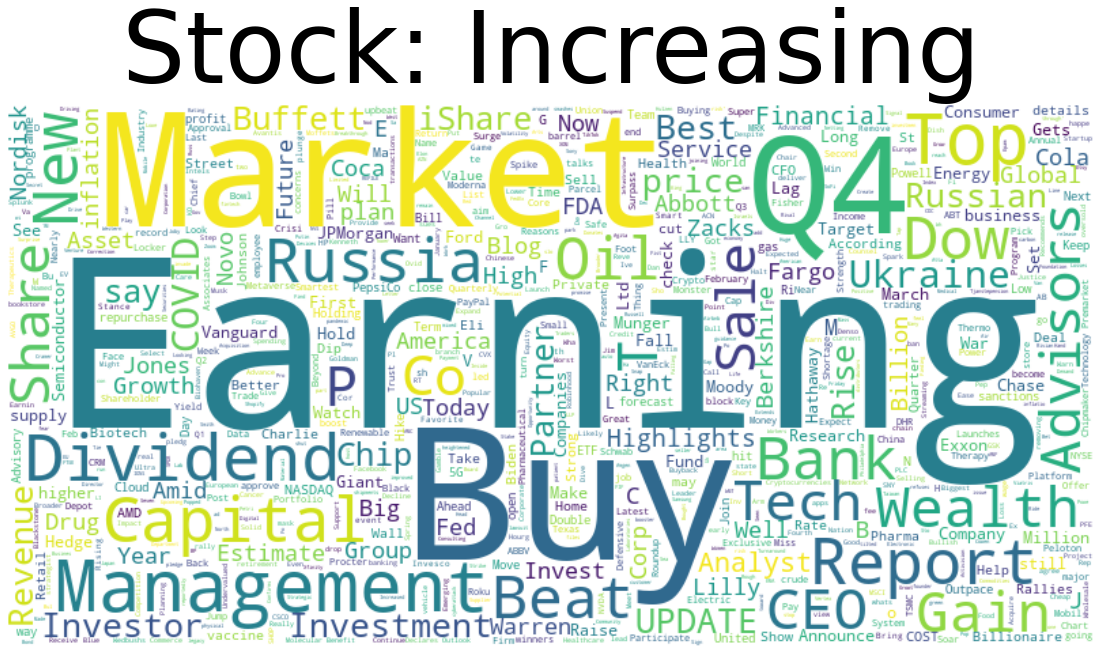

In [31]:
# Display the generated image:
# the matplotlib way:
# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title("Stock: Increasing", size = 100)
plt.axis("off")
plt.show()

In [32]:
# select the headlines with decreasing trend
decrease = result.loc[result["Trend"] == '0', "News Headline"]
# Change the headlines into string
d = decrease.to_string()

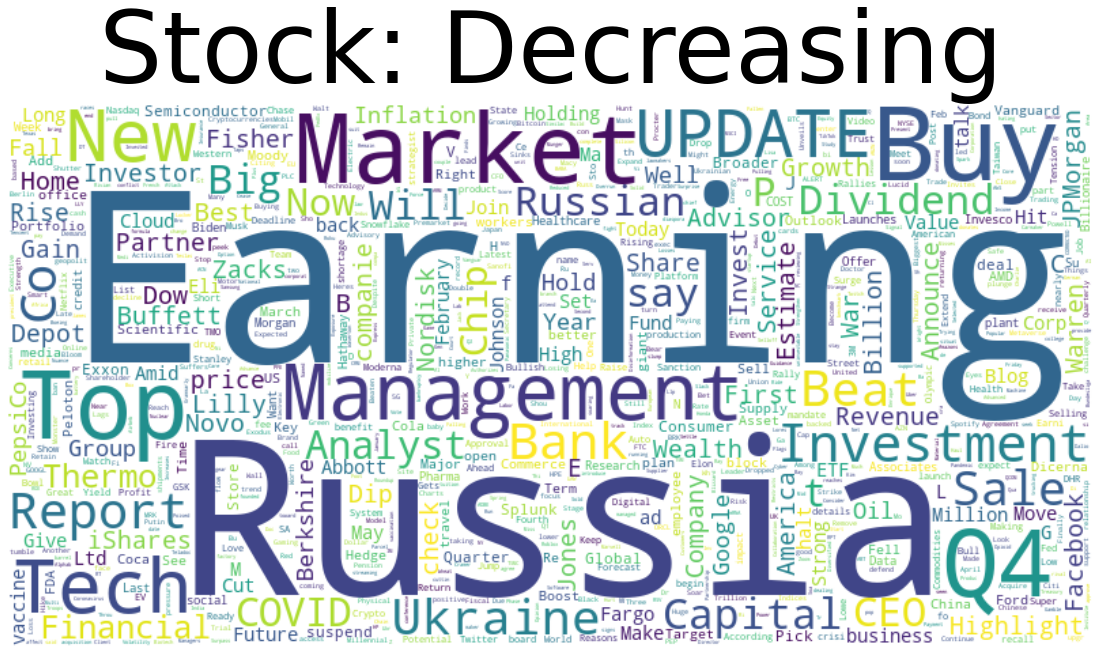

In [33]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        max_words=5000, stopwords=stopwords, width=800, height=400).generate(d)
# saving the image
word_cloud2.to_file('decrease.png')
# Display the generated image:
# the matplotlib way:
# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title("Stock: Decreasing", size = 100)
plt.axis("off")
plt.show()

### Part II: Sentiment analysis

Sentiment analysis is a type of natural language processing that tries to forecast opinion, feeling, or point of view. The availability of a large amount of sentiment corpus, as well as the enormous potential of sentiment analysis applications, has increased interest in sentiment analysis. Events that happened in the world were reported in news articles. Also it shares expert opinions. Many factors can affect market sentiment. Headline can be regarded as a brief summary of an article which is in a single sentence. In this part, we examined two different approaches, namely TextBlob and NLTK-Valder Lexicon in predicting the sentiment of a news headline. This part two techniques (TextBlob and NLTK-Valder Lexicon tools) in predicting the sentiment of the readers toward news headlines from Financial Visualization were evaluated.----prediction---

 ***Methodology***

*NLTK-Sentiment-Analysis*

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bozhang/nltk_data...


True

In [35]:
result = pd.read_csv("mergeddata.csv")

In [36]:
sia=SentimentIntensityAnalyzer()

result['NLTK_Compound'] = result['News Headline'].apply(lambda headline: sia.polarity_scores(headline)['compound'])

In [37]:
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'

In [38]:
result['NLTK_Sentiment'] = result['NLTK_Compound'].apply(lambda value: sentiment_declareation(value))

In [39]:
result['Date'] = pd.to_datetime(result.Date).dt.date
result

,Company,Date,Time,News Headline,Open,High,Low,Close,Volume,Trend,NLTK_Compound,NLTK_Sentiment
0,AAPL,2022-03-06,03:34PM,Netflix Is Shutting All Services in Russia Aft...,NaN,NaN,NaN,NaN,NaN,NaN,-0.5994,neg
1,AAPL,2022-03-06,05:51AM,3 Stocks That Could Be Worth More Than Apple b...,NaN,NaN,NaN,NaN,NaN,NaN,0.2263,pos
2,AAPL,2022-03-05,10:39AM,PayPal suspends services in Russia,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu
3,AAPL,2022-03-05,09:52AM,"'The Batman' aims for $100M open, eyes introdu...",NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu
4,AAPL,2022-03-05,08:35AM,3 Robinhood Stocks That Are Great Long-Term Picks,NaN,NaN,NaN,NaN,NaN,NaN,0.6249,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZN,2022-01-29,05:14AM,China Summons AstraZeneca Over Probe in Altere...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu
4996,AZN,2022-01-28,05:38PM,"Americana Partners, LLC Buys Adobe Inc, Apple ...",57.892495,58.374525,57.597377,58.335175,5038700.0,1.0,0.1779,neu
4997,AZN,2022-01-27,05:38PM,Starr International Co Inc Buys Celularity Inc...,57.076003,59.191020,56.987467,58.551598,10104700.0,1.0,0.0000,neu
4998,AZN,2022-01-27,04:14PM,Market check: Stocks lose steam into session c...,57.076003,59.191020,56.987467,58.551598,10104700.0,1.0,-0.4019,neg


*TextBlob-Sentiment-Analysis*

In [43]:
from textblob import TextBlob

In [44]:
def textblob_analysis(news_headline):
  analysis = TextBlob(news_headline)
  return analysis.sentiment.polarity

In [45]:
result['TextBlob_Compound'] = result['News Headline'].apply(lambda headline: textblob_analysis(headline))

In [46]:
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'

In [47]:
result['TextBlob_Sentiment'] = result['TextBlob_Compound'].apply(lambda value: sentiment_declareation(value))
result['Date'] = pd.to_datetime(result.Date).dt.date
result

,Company,Date,Time,News Headline,Open,High,Low,Close,Volume,Trend,NLTK_Compound,NLTK_Sentiment,TextBlob_Compound,TextBlob_Sentiment
0,AAPL,2022-03-06,03:34PM,Netflix Is Shutting All Services in Russia Aft...,NaN,NaN,NaN,NaN,NaN,NaN,-0.5994,neg,0.000000,neu
1,AAPL,2022-03-06,05:51AM,3 Stocks That Could Be Worth More Than Apple b...,NaN,NaN,NaN,NaN,NaN,NaN,0.2263,pos,0.400000,pos
2,AAPL,2022-03-05,10:39AM,PayPal suspends services in Russia,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu,0.000000,neu
3,AAPL,2022-03-05,09:52AM,"'The Batman' aims for $100M open, eyes introdu...",NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu,0.068182,neu
4,AAPL,2022-03-05,08:35AM,3 Robinhood Stocks That Are Great Long-Term Picks,NaN,NaN,NaN,NaN,NaN,NaN,0.6249,pos,0.800000,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZN,2022-01-29,05:14AM,China Summons AstraZeneca Over Probe in Altere...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,neu,0.000000,neu
4996,AZN,2022-01-28,05:38PM,"Americana Partners, LLC Buys Adobe Inc, Apple ...",57.892495,58.374525,57.597377,58.335175,5038700.0,1.0,0.1779,neu,0.000000,neu
4997,AZN,2022-01-27,05:38PM,Starr International Co Inc Buys Celularity Inc...,57.076003,59.191020,56.987467,58.551598,10104700.0,1.0,0.0000,neu,0.000000,neu
4998,AZN,2022-01-27,04:14PM,Market check: Stocks lose steam into session c...,57.076003,59.191020,56.987467,58.551598,10104700.0,1.0,-0.4019,neg,0.000000,neu


In [51]:
result.to_csv('mergeddata_sentiment.csv', index=False)
dp = pd.read_csv("mergeddata_sentiment.csv")

***classfication***

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

In [53]:
#import the preprocessed data set (with stock prices, news headlines, and sentiment scores)
data = pd.read_csv('mergeddata_sentiment.csv')
data.head()

#inspect missing values
data.isnull().sum()

#drop nans
df = data.dropna()
df.isnull().sum()

Company               0
Date                  0
Time                  0
News Headline         0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Trend                 0
NLTK_Compound         0
NLTK_Sentiment        0
TextBlob_Compound     0
TextBlob_Sentiment    0
dtype: int64

***logistic regression***

In [54]:
#build two separate logistic regression models for nltk and textblob
#response variable: trend(1 represent the stock prices increase from previous day, otherwise 0)
#input variable: sentiment scores from nltk and textblob accordingly

#logistic regression for nltk sentiment
X = df.iloc[:, 10].to_numpy().reshape(-1, 1)
y = df.iloc[:,9].to_numpy().reshape(-1, 1).astype(int).astype(str)

#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#build logistic regression model
logreg = LogisticRegression()

#fit logistic regression model on train data
logreg.fit(X_train, y_train.ravel())

#make predicitons using test data
y_pred_lr=logreg.predict(X_test)

0.5178764897074756

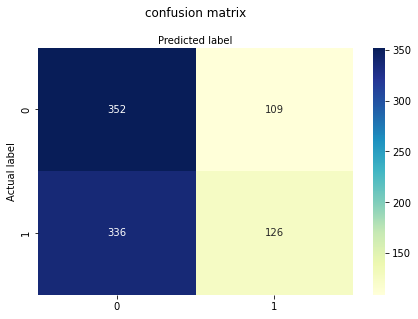

In [55]:
#get confusion matrix and accuracy score for using nltk sentiment score
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_lr)
cnf_matrix

#plot the heat map of confusion matrix
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#obtain the prediction accuracy
accuracy_lr = metrics.accuracy_score(y_test,y_pred_lr)
accuracy_lr

***SVM***

0.5287107258938245

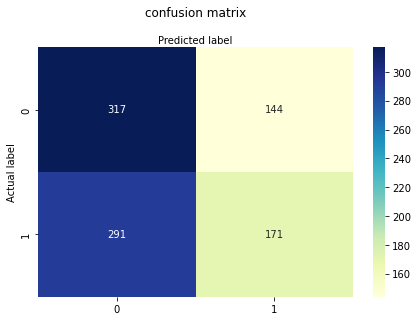

In [62]:
#use svm to predict the trend of stock price
clf = svm.SVC(C=0.8, kernel='rbf', gamma= 5, decision_function_shape='ovr')
clf.fit(X_train, y_train.ravel())
y_pred_svm = clf.predict(X_test)


#obtain the confusion matrix and heatmap
cnf_matrix_svm = metrics.confusion_matrix(y_test,y_pred_svm)
cnf_matrix_svm

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_svm),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#obtain the accuracy score
accuracy_svm = metrics.accuracy_score(y_test,y_pred_svm)
accuracy_svm

In [68]:
#build a random forrest model to predict the trend
rf=RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train.ravel())
y_pred_rf = rf.predict(X_test)

# use random forest to calculate the accuracy
accuracy_rf = rf.score(X_test, y_test)
accuracy_rf


0.5362946912242686

Text(0.5, 257.44, 'Predicted label')

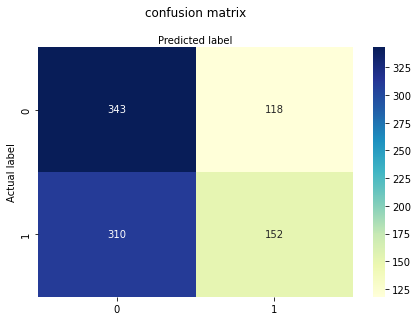

In [70]:
#obtain the confusion matrix and heatmap
cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred_rf)
cnf_matrix_rf

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_rf),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')